# Entrenar una Red Neuronal Sencilla
Este Notebook tiene como objetivo utilizar cifar10 con dos capaz de Dense (tensorflow 2 & keras y dual GPU).
Posteriormente so precedera a mejorar la presicion en el reconocimiento de las imagenes


## import
Se utilizara: <br> tensorflow <br> keras <br> + una estrategia distribuida sobre las GPU (tengo habilitadas 2 GPUS 1080)


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

print(x_train.shape)

(50000, 32, 32, 3)


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [4]:
def get_compiled_model():
    
    input_layer = Input(shape=(32,32,3))
    x = Flatten()(input_layer)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    
    output_layer = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(input_layer, output_layer)
    
    opt = Adam(lr=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        
    return model

    


In [5]:
#crear strategia de 2 GPUS
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],
                                         cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

print("number of devices: {}".format(strategy.num_replicas_in_sync))

with strategy.scope():
    model = get_compiled_model()


number of devices: 2


In [6]:
model.fit(x_train, y_train, batch_size=32,  epochs=10, shuffle = True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8471 - accuracy: 0.3341 - val_loss: 1.7257 - val_accuracy: 0.3914
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6715 - accuracy: 0.4017 - val_loss: 1.6233 - val_accuracy: 0.4195
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5899 - accuracy: 0.4328 - val_loss: 1.5637 - val_accuracy: 0.4436
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5324 - accuracy: 0.4560 - val_loss: 1.4982 - val_accuracy: 0.4718
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4921 - accuracy: 0.4688 - val_loss: 1.4843 - val_accuracy: 0.4724
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4610 - accuracy: 0.4781 - val_loss: 1.4754 - val_accuracy: 0.4760
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4336 - accuracy: 0.4926 - val_loss: 1.4577 - val

In [7]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)

In [8]:
preds_single = CLASSES[np.argmax(preds , axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

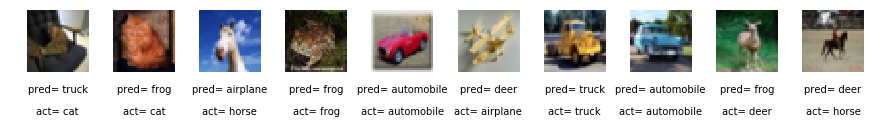

In [9]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)


for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.clear()
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred= ' + str( preds_single[idx]), fontsize=10, ha='center', transform =ax.transAxes)
    ax.text(0.5, -0.7, 'act= ' + str( actual_single[idx]), fontsize=10, ha='center', transform =ax.transAxes)
    ax.imshow(img)